# Extracción de topics

Los topic son palabras que tienden a aparecer juntas en los mismos contextos y nos perniten detectar relaciones, dificiles de apreciar

El algotirmo Latent Direchlet Allocation (LDA), nos retorna los topics que componen una colección de documentos  y por otro una medida de cuánto esta cada topic, esta presente en el documento

Los topics son una distribución de probabilidades, de la aparición de cada palabra en el vocabulario

![](https://elmundodelosdatos.com/wp-content/uploads/2021/03/ejmplo-topic-e1616008061311-1024x698.png)

En el ejemplo para el topic 0, podemos ver que contiene la palabra violencia en un 5.7%, la palabra género en un 4.5% y la palabra mujer en un 3.7%. Estas son las palabras que más contribuyen al tópico, por lo que el periodista podría interpretar que este tópico tiene relación con la violencia de género. 

Desde el punto de vista de los documentos, el algoritmo nos dice que la noticia con el titular Sevilla registra 300 denuncias por violencia de género está compuesta en un 43.34% del Tópico 0. Por lo tanto, al contener este tópico en tal alto porcentaje, el periodista vinculará el artículo a la violencia de género.

## Lectura de datos

Lo primero vamos a leer el fichero desde drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
PATH_DATA= '/content/drive/MyDrive/Colab Notebooks/nlp_introduction_course/data'
DATASET_NAME = 'noticias.txt'

Mounted at /content/drive


Importaciones necesarias para procesar el texto

In [ ]:
import json, re
import pandas as pd 
from nltk.stem import SnowballStemmer

Leemos el fichero para obtener datos, y lo convertimos en un data frame y lo pasamos a una lista de listas, con la forma titular -> Noticia

In [ ]:
with open(f'{PATH_DATA}/{DATASET_NAME}') as json_file: # Abrimos el fichero desde Drive
    datos = json.load(json_file) # Lo procesamos como un json
    lista_noticias = [[item.get("titular"),item.get("texto")] for item in datos]


Por nuestra comodidad lo convertimos en un dataframe de Pandas

In [ ]:
df_noticias = pd.DataFrame(lista_noticias, columns =['Titular', 'Noticia'])
print(df_noticias.shape)

(5665, 2)


In [ ]:
df_noticias.head()

,Titular,Noticia
0,Un estudio impulsado por la Universidad de San...,El virus SARS-Cov-2 entró en España por la ciu...
1,Las claves: qué es Montai y quién está detrás,¿Qué es Montai? ¿Qué relación guarda con las o...
2,Robots entregan domicilios en Medellín durante...,Unos 15 robots recorren las calles de Medellín...
3,Grazón insiste en que un nuevo estado de alarm...,"En una entrevista en Radio Euskadi, recogida p..."
4,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu..."


## Limpieza de datos

Creamos una función para aplicar expresiones regulares para limpiar el texto

Podemos encontrar ayuda para expresiones regulares [aquí](https://www.ibiblio.org/pub/linux/docs/LuCaS/Manuales-LuCAS/doc-guia-usuario-ruby/doc-guia-usuario-ruby-html/c173.html)

In [ ]:
def limpiar_texto(texto):
  #Eliminación de caracteres especiales
  texto = texto = re.sub(r'\W', ' ', str(texto)) # Solo se quedata con la sucesión de caracteres que alfanuméricos
  # Eliminado las palabras que tengo un solo caracter
  texto = re.sub(r'\s\w\s', ' ', texto) # Las palabras entre dos espacion que tengan longitud 1 se eliminaran
  # Eliminado digitos
  texto = re.sub(r'\s\d+\s', ' ', texto) # Se eliminan los digitos
  # Sustituir los espacios en blanco en uno solo
  texto = re.sub(r'\s+', ' ', texto, flags=re.I)
  # Convertimos textos a minusculas
  return texto.lower()

Aplicamos la funcion al cuerpo de la noticia

In [ ]:
df_noticias["CleanText"] = df_noticias['Noticia'].apply(limpiar_texto)
df_noticias.head()

,Titular,Noticia,CleanText
0,Un estudio impulsado por la Universidad de San...,El virus SARS-Cov-2 entró en España por la ciu...,el virus sars cov entró en españa por la ciuda...
1,Las claves: qué es Montai y quién está detrás,¿Qué es Montai? ¿Qué relación guarda con las o...,qué es montai qué relación guarda con las otr...
2,Robots entregan domicilios en Medellín durante...,Unos 15 robots recorren las calles de Medellín...,unos robots recorren las calles de medellín pa...
3,Grazón insiste en que un nuevo estado de alarm...,"En una entrevista en Radio Euskadi, recogida p...",en una entrevista en radio euskadi recogida po...
4,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu...",españa ha dejado de ser católica decía manuel...


### Tokenización

Vamos a tokenizar el texto qu ehemos limpiado, para poder trabajar con el

In [ ]:
from nltk.tokenize import ToktokTokenizer
tokenizador = ToktokTokenizer()
df_noticias["Tokens"] = df_noticias["CleanText"].apply(tokenizador.tokenize)

In [ ]:
df_noticias.head()

,Titular,Noticia,CleanText,Tokens
0,Un estudio impulsado por la Universidad de San...,El virus SARS-Cov-2 entró en España por la ciu...,el virus sars cov entró en españa por la ciuda...,"[el, virus, sars, cov, entró, en, españa, por,..."
1,Las claves: qué es Montai y quién está detrás,¿Qué es Montai? ¿Qué relación guarda con las o...,qué es montai qué relación guarda con las otr...,"[qué, es, montai, qué, relación, guarda, con, ..."
2,Robots entregan domicilios en Medellín durante...,Unos 15 robots recorren las calles de Medellín...,unos robots recorren las calles de medellín pa...,"[unos, robots, recorren, las, calles, de, mede..."
3,Grazón insiste en que un nuevo estado de alarm...,"En una entrevista en Radio Euskadi, recogida p...",en una entrevista en radio euskadi recogida po...,"[en, una, entrevista, en, radio, euskadi, reco..."
4,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu...",españa ha dejado de ser católica decía manuel...,"[españa, ha, dejado, de, ser, católica, decía,..."


### Eliminación de StopWords

Ahora vamos a eliminar las palabras que no aportan significado

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

def eliminar_stopwords(tokens):
  ltoken = []
  stop_words_spanish = set(stopwords.words("spanish"))
  for t in tokens:
    if t not in stop_words_spanish:
      ltoken.append(t)
  return ltoken

Y lo aplicamos al dataframe

In [ ]:
df_noticias["TokensNoStopWords"] = df_noticias["Tokens"].apply(eliminar_stopwords)
df_noticias.head()

,Titular,Noticia,CleanText,Tokens,TokensNoStopWords
0,Un estudio impulsado por la Universidad de San...,El virus SARS-Cov-2 entró en España por la ciu...,el virus sars cov entró en españa por la ciuda...,"[el, virus, sars, cov, entró, en, españa, por,...","[virus, sars, cov, entró, españa, ciudad, vito..."
1,Las claves: qué es Montai y quién está detrás,¿Qué es Montai? ¿Qué relación guarda con las o...,qué es montai qué relación guarda con las otr...,"[qué, es, montai, qué, relación, guarda, con, ...","[montai, relación, guarda, empresas, quién, de..."
2,Robots entregan domicilios en Medellín durante...,Unos 15 robots recorren las calles de Medellín...,unos robots recorren las calles de medellín pa...,"[unos, robots, recorren, las, calles, de, mede...","[robots, recorren, calles, medellín, realizar,..."
3,Grazón insiste en que un nuevo estado de alarm...,"En una entrevista en Radio Euskadi, recogida p...",en una entrevista en radio euskadi recogida po...,"[en, una, entrevista, en, radio, euskadi, reco...","[entrevista, radio, euskadi, recogida, europa,..."
4,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu...",españa ha dejado de ser católica decía manuel...,"[españa, ha, dejado, de, ser, católica, decía,...","[españa, dejado, ser, católica, decía, manuel,..."


### Stemming

Vamos a búscar realizar Stemming sobre las palabras para reducir la complejidad eliminando sufijos y afijos, y manejando así, solo las raices de las palabras

Para ello vamos a usar el objeto **SnowballStemmer** de **nltk**

In [ ]:
def stemming_tokens(tokens):
    ltoken = []
    stemmer = SnowballStemmer("spanish")
    for t in tokens:
      ltoken.append(stemmer.stem(t))
    return ltoken

Y aplicamos la función sobre los datos

In [ ]:
df_noticias["TokensStemmed"] = df_noticias["TokensNoStopWords"].apply(stemming_tokens)
df_noticias.head()

,Titular,Noticia,CleanText,Tokens,TokensNoStopWords,TokensStemmed
0,Un estudio impulsado por la Universidad de San...,El virus SARS-Cov-2 entró en España por la ciu...,el virus sars cov entró en españa por la ciuda...,"[el, virus, sars, cov, entró, en, españa, por,...","[virus, sars, cov, entró, españa, ciudad, vito...","[virus, sars, cov, entro, españ, ciud, vitori,..."
1,Las claves: qué es Montai y quién está detrás,¿Qué es Montai? ¿Qué relación guarda con las o...,qué es montai qué relación guarda con las otr...,"[qué, es, montai, qué, relación, guarda, con, ...","[montai, relación, guarda, empresas, quién, de...","[montai, relacion, guard, empres, quien, detra..."
2,Robots entregan domicilios en Medellín durante...,Unos 15 robots recorren las calles de Medellín...,unos robots recorren las calles de medellín pa...,"[unos, robots, recorren, las, calles, de, mede...","[robots, recorren, calles, medellín, realizar,...","[robots, recorr, call, medellin, realiz, entre..."
3,Grazón insiste en que un nuevo estado de alarm...,"En una entrevista en Radio Euskadi, recogida p...",en una entrevista en radio euskadi recogida po...,"[en, una, entrevista, en, radio, euskadi, reco...","[entrevista, radio, euskadi, recogida, europa,...","[entrev, radi, euskadi, recog, europ, press, g..."
4,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu...",españa ha dejado de ser católica decía manuel...,"[españa, ha, dejado, de, ser, católica, decía,...","[españa, dejado, ser, católica, decía, manuel,...","[españ, dej, ser, catol, dec, manuel, azañ, co..."


## Generación de diccionario y corpus

El corpus y el diccionario, son las entradas que vamos a necesitar para que sean procesadas por el algoritmo LDA, por lo tanto en los proximos pasos, vamos a generarlo

### Diccionario

Los diccionarios son objetos en los que asignamos un identificador númerico a cada palabra.

Usando **Gensim**, es muy sencillo, solo tenemos que pasar la lista de tokens que hemos procesado en los pasos anteriores al objeto **Dictionary**

In [ ]:
from gensim.corpora import Dictionary
diccionario = Dictionary(df_noticias["TokensStemmed"])

In [ ]:
print(f'Número de palabras en nuestro diccionario: {len(diccionario)}')
print(list(diccionario.items())[100:120])

Número de palabras en nuestro diccionario: 48476
[(100, 'fuert'), (101, 'fundamental'), (102, 'futur'), (103, 'galici'), (104, 'genet'), (105, 'genom'), (106, 'geoespacial'), (107, 'global'), (108, 'gran'), (109, 'grand'), (110, 'grup'), (111, 'herramient'), (112, 'hic'), (113, 'hiz'), (114, 'hoy'), (115, 'identific'), (116, 'idis'), (117, 'impact'), (118, 'implic'), (119, 'import')]


Hay 48476 palabras en el diccionario. Esto implica un tiempo de proceso importante. Para la tarea que vamos a realizar, no aportan mucho las palabras que solo aparecen en 1 documento, y tampoco las que aparecen en todos o casi todos los documentos, asi que vamos a eliminarlas de el diccionario

In [ ]:
diccionario.filter_extremes(no_below=2, no_above = 0.8) # no_bellow, indica que han de aparecer al menos en 2 documentos, y no_above, indica que elimine aquellas que aparecen en al menos el 80% de los documentos
print(f'Número de palabras en nuestro diccionario:  {len(diccionario)}')

Número de palabras en nuestro diccionario:  26233


Ahora, hemos reducido significativamente el tamaño del diccionario

### Corpus

Ahora vamos a obtener el otro parametro que necesitara el algoritmo LDA que vamos a usar, es decir la bolsa de palabras o BOW (BagOfWords), donde aparecerán las palabras (su identificador que generamos en el paso anterior) y la frecuencia de aparición

Para ello **Gensim** ofrece la función doc2bow sobre el diccionario, que recibira como parámetro la lista de tokens de cada noticia, y retornara una tupla del tipo identificadorPalabra --> Frecuencia en el documento

Basimanete lo que necesitamos es iterar sobre todos los documentos, y la salida esperada sera una lista de listas, donde cada elemento sera la lista de tuplas identificadorPalabra --> Frecuencia, para cada documento.

In [ ]:
# Creamos el corpus 
corpus = [diccionario.doc2bow(tokens) for tokens in df_noticias["TokensStemmed"]]

# Mostramos el BOW de la noticia 1
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 4), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 4), (49, 3), (50, 2), (51, 1), (52, 4), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 2), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 9), (72, 2), (73, 1), (74, 7), (75, 1), (76, 1), (77, 2), (78, 2), (79, 1), (80, 1), (81, 3), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 3), (96, 9), (97, 1), (98, 2), (99, 2), (100, 2), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 2), (108, 4), (109, 1), (110, 1),

Para ver que palabra, corresponede a que identificador, siempre podemos hacer

In [ ]:
print(diccionario[13])

antoni


Entonces la tupla (13, 2), indica que la palabra con identificador 13, osea antoni, aparece 2 veces en el documento

## Construcción del modelo LDA

La clave para comprender los algoritmos LDA, es asumir que para el algoritmo  la función de las palabras, es formar topics, y que estas comunican la misma información, independientemente de donde se encuentren dentro del documento, lo que permite no tener en cuenta el orden. Esto implica que por ejemplo la frase, Juan hablo con Pedro, es igual que la frase Pedro hablo con Juan, al menos desde el punto de vista de la frecuencia de palabras. Esto no es util desde el punto de vista semantico, ya que en ambas frases hemos cambiado el significado, pero si desde el punto de vista de topics en un documento.

Un ejemplo, puede ser que para documentos de una misma empresa, probablemente aparezcan con frecuencia referencias a distintos departamentos, por ejemplo RRHH, Marketing, etc.... y dentro de los documentos de estos departamenteos, haya ciertas palabras que aparezcan con mas frecuencia cuando hablamos de por ejemplo RRHH (como por ejemplo las palabras curriculum, nomina....), que cuando hablamos de por ejemplo Marketing. Esto hace que sea posible catalogar los documentos, en función de patrones de plabras frecuentes en elllos.

Los modelos LDA se basan en identificar topics (palabras frecuentes), y a partir de ellos, catalogar documentos.

Para entrenar un modelo LDA en **Gensim**, solo es necesario usar el objeto **LdaModel**, teniendo en cuenta los siguientes parámetros:
- **num_topics:** Número de topics que queremos identificar
- **random_state:** Este parametro permite controlar la aleatoriedad del proceso de entrenamiento. Podemos definir una semilla, de forma que distintos entrenamientos, con la misma semilla, retornen los mismos resultados
- **chunksize:** Número de documentos que seran selecionados (seudo-aleatoriamente), para realizar el entrenamiento
- **passes:** Número de pasadas (de todo el corpus), durante el entrenamiento
- **alpha:** Representa la densidad de topics por documento. Un mayor valor, implica que lso documentos estan compuestos por más tópicos.

In [ ]:
from gensim.models import LdaModel

In [ ]:
lda = LdaModel(corpus=corpus, id2word=diccionario, 
               num_topics=50, random_state=42, 
               chunksize=1000, passes=10, alpha='auto')

Podemos gaurdar el modelo en disco

In [ ]:
PATH_MODEL = '/content/drive/MyDrive/Colab Notebooks/nlp_introduction_course/models'
lda.save(f'{PATH_MODEL}/lda_topcis_model')

Y volver a cargarlo si lo necesitamos

In [ ]:
lda = LdaModel.load(f'{PATH_MODEL}/lda_topcis_model')

Para visualizar los topics identificados, podemos usar la función, print_topics de el modelo lda, indicado los siguientes parámetros

- num_words: numero de palabras por topic que queremos mostrar
- num_topics: número de topics que queremos mostrar

In [ ]:
topicos = lda.print_topics(num_words=10, num_topics=20)
for topico in topicos:
    print(topico)

(48, '0.250*"chin" + 0.050*"core" + 0.036*"colombi" + 0.029*"asiat" + 0.028*"kong" + 0.027*"hong" + 0.022*"paz" + 0.022*"colombian" + 0.021*"azuc" + 0.016*"nort"')
(34, '0.068*"celebr" + 0.061*"event" + 0.051*"fiest" + 0.037*"cancel" + 0.023*"feri" + 0.021*"organiz" + 0.018*"orquest" + 0.016*"pep" + 0.015*"sant" + 0.014*"juli"')
(26, '0.044*"tarjet" + 0.020*"caj" + 0.018*"black" + 0.016*"gast" + 0.014*"madr" + 0.014*"serran" + 0.013*"rat" + 0.013*"mauthaus" + 0.013*"bles" + 0.012*"japon"')
(43, '0.064*"fals" + 0.025*"dic" + 0.023*"maldit" + 0.022*"dat" + 0.018*"afirm" + 0.018*"vox" + 0.014*"abascal" + 0.014*"segun" + 0.013*"declar" + 0.013*"cas"')
(42, '0.062*"castill" + 0.047*"leon" + 0.045*"vot" + 0.028*"junt" + 0.022*"electoral" + 0.020*"manch" + 0.018*"eleccion" + 0.016*"francisc" + 0.013*"gonzalez" + 0.013*"buen"')
(28, '0.038*"contrat" + 0.020*"eur" + 0.019*"montai" + 0.017*"grup" + 0.017*"empres" + 0.016*"adjud" + 0.010*"pnv" + 0.009*"concurs" + 0.008*"memori" + 0.008*"trabaj"')

Por cada topic podemos ver las palabras ordenadas por importancia, y sus pesos. El peso indica cuanto de importante es esa palabra para el topic

Por ejemplo para el topic 39 tenemos lo siguiente

(39, '0.039*"rey" + 0.032*"juan" + 0.031*"carl" + 0.016*"suiz" + 0.013*"emerit" + 0.013*"español" + 0.011*"felip" + 0.011*"investig" + 0.010*"monarqu" + 0.010*"vi"')

La palabras que mas importancia tienen es son rey, juan, carlos suiza, emerito, invetivado.... esta claro que habla de el rey emerito, y de las últimas noticias relacionadas con el

### Previsualización 

Para hacerlo mas sencillo, vamos a representar los topics en forma de nubes de palabras, de forma que las palabras con mayor peso, aparezcan con un mayor tamaño

Para ello, usaremos la librería **WordCloud**

In [ ]:
def pintar_topics(lda,n,col):
  from wordcloud import WordCloud
  import matplotlib.pyplot as plt
  import math
  n_filas = math.ceil(n/col)
  n_columnas = col
  f, axarr = plt.subplots(n_filas, n_columnas, sharex='all', sharey='all', figsize=(30, 30))
  axarr = axarr.flatten()
  for i in range(1, n_filas*n_columnas+1):
      axarr[i-1].imshow(WordCloud(background_color='white', prefer_horizontal=1.0)
                .fit_words(dict(lda.show_topic(i, 20))))
      axarr[i-1].axis("off")
      axarr[i-1].set_title(f'Tópico {i}')
  plt.show()

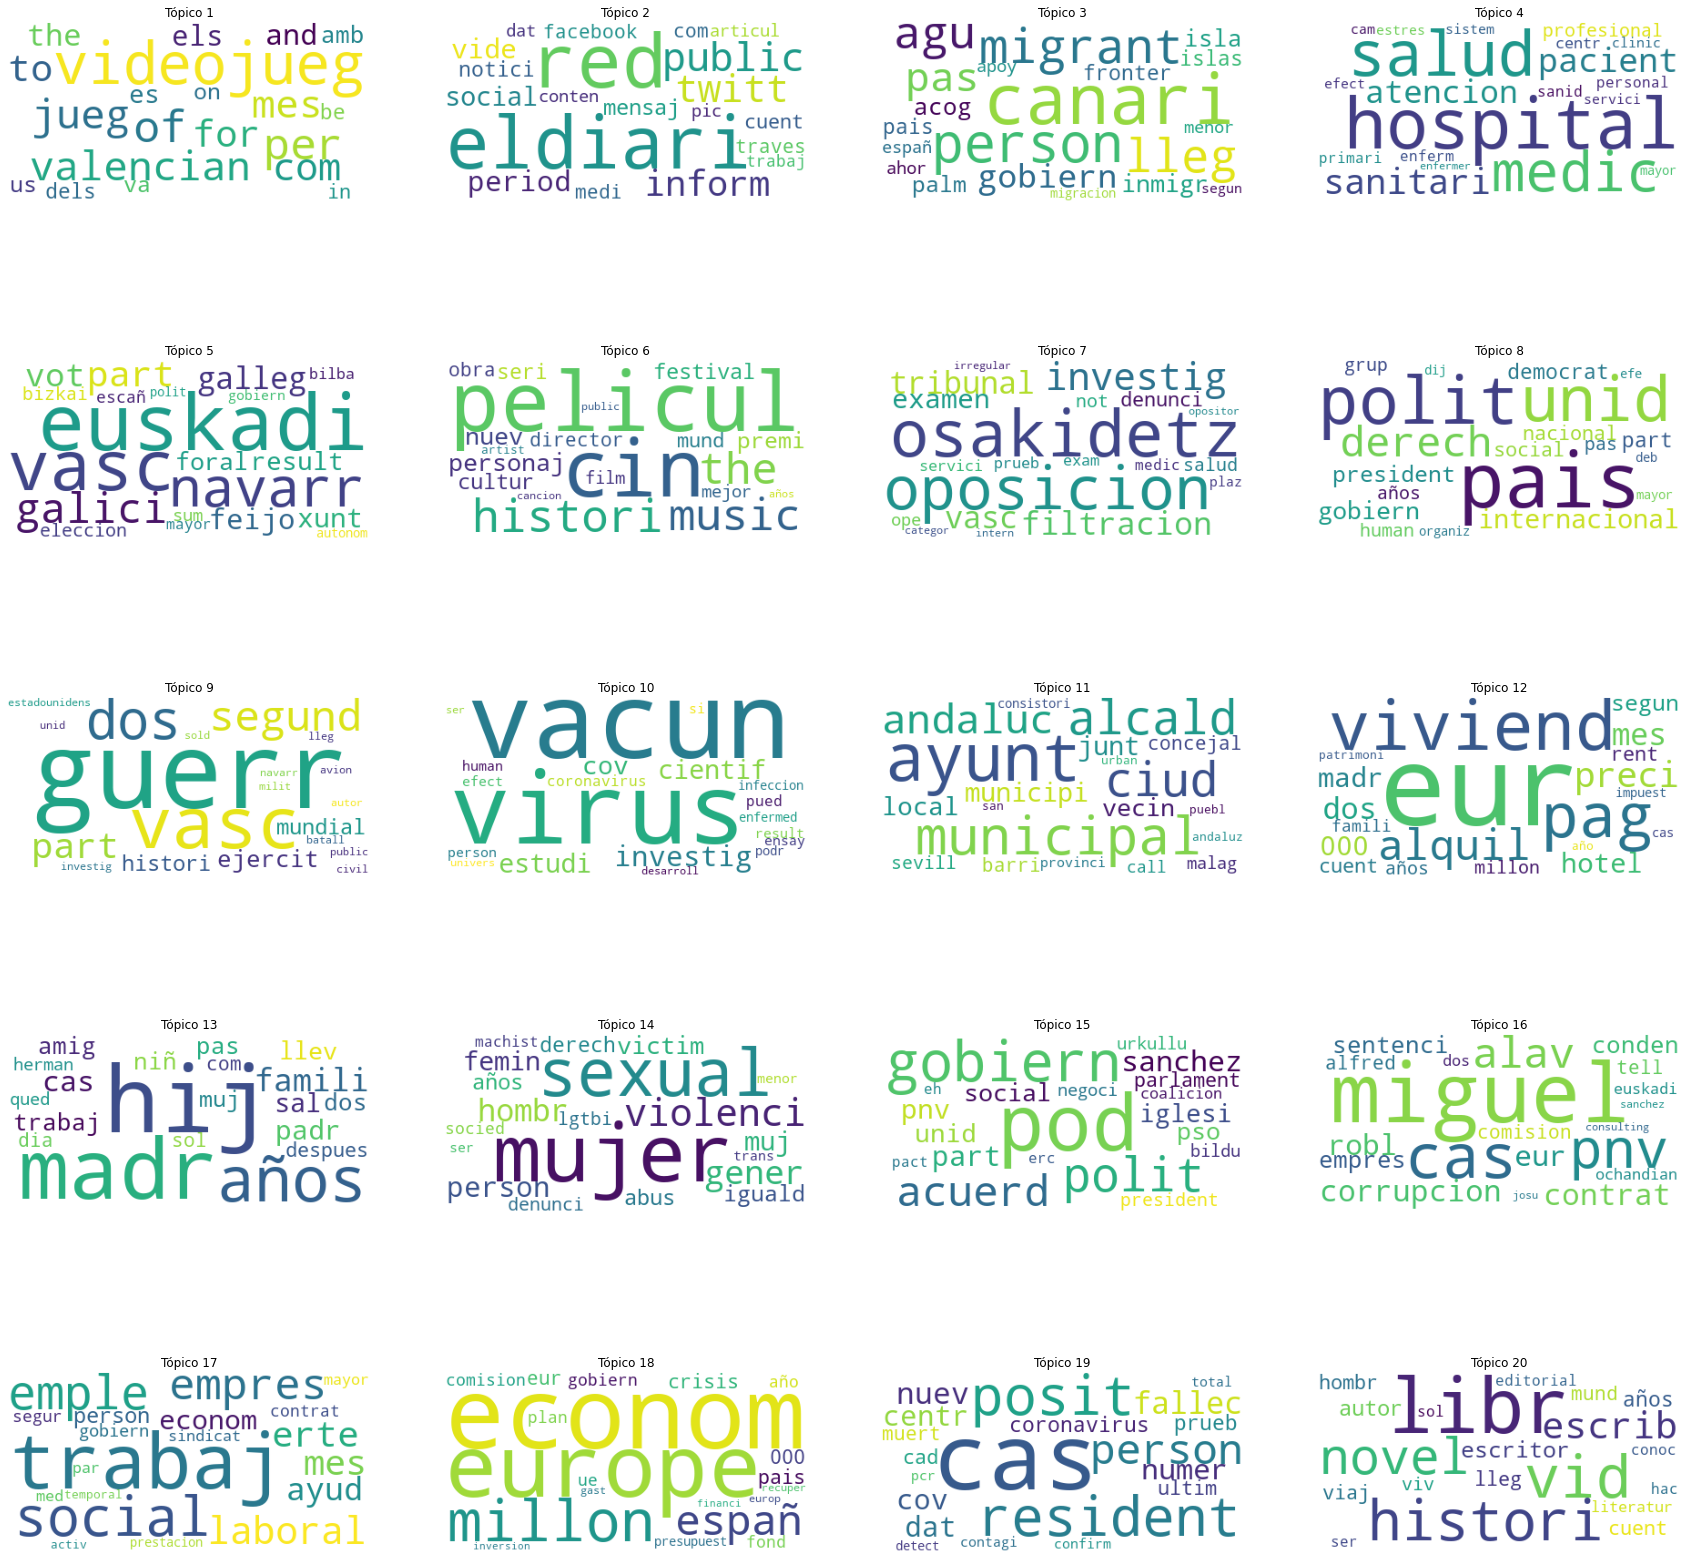

In [ ]:
pintar_topics(lda,20,4)

## Evaluación del modelo

Para empezar cogeremos una noticia al azar, entre las noticias con las que hemos entrenado el modelo

In [ ]:
import random
# indice_noticia = random.randint(0,len(df_noticias))
indice_noticia = 3162
noticia = df_noticias.iloc[indice_noticia]
print("Titular: " + noticia.Titular)
print(noticia.Noticia)

Titular: La dimisión de la directora de Salud Pública agrava la crisis en el Gobierno de Ayuso, partido por la mitad
A primera hora del miércoles, Isabel Díaz Ayuso expresó sus dudas sobre que Madrid estuviese preparada para entrar en la siguiente fase de la desescalada. El vicepresidente de la región, Ignacio Aguado, había dicho un día antes que sí lo estaba. La reunión del Consejo de Gobierno para tomar una decisión definitiva incluyó un abandono repentino de la presidenta madrileña para acudir a un acto en un hospital que incluyó un directo en televisión. Su número dos mostró su perplejidad –y también sus quejas– en la rueda de prensa posterior.                 La decisión de Ayuso de pedir que Madrid pase a fase 1 abre una crisis en su gobierno: dimite la directora de Salud Pública Saber más           El cisma entre PP y Ciudadanos ha alcanzado su cénit este jueves con la dimisión de la directora de Salud Pública en plena crisis del coronavirus, después de negarse a firmar el infor

Extraemos la bolsa de palabras del corpus para esa noticia

In [ ]:
bow_noticia = corpus[indice_noticia]

Despues pedimos al modelo la distribución de probabilidades de topicos para la noticia

In [ ]:
distribucion_topicos_noticia = lda[bow_noticia]

In [ ]:
print(distribucion_topicos_noticia)

[(22, 0.7736456), (23, 0.014847929), (25, 0.011902329), (36, 0.16858913)]


Lo pasamos a un Dataframe

In [ ]:
df_distribucion_topicos_noticia = pd.DataFrame(distribucion_topicos_noticia, columns =['Topic', 'Probability'])
df_distribucion_topicos_noticia.head()

,Topic,Probability
0,22,0.773646
1,23,0.014848
2,25,0.011902
3,36,0.168589


Ordenamos los valores por la probabilidad

In [ ]:
df_distribucion_topicos_noticia.sort_values('Probability', ascending=False, inplace=True)

Pintamos un histograma, con los topics y sus frecuencias

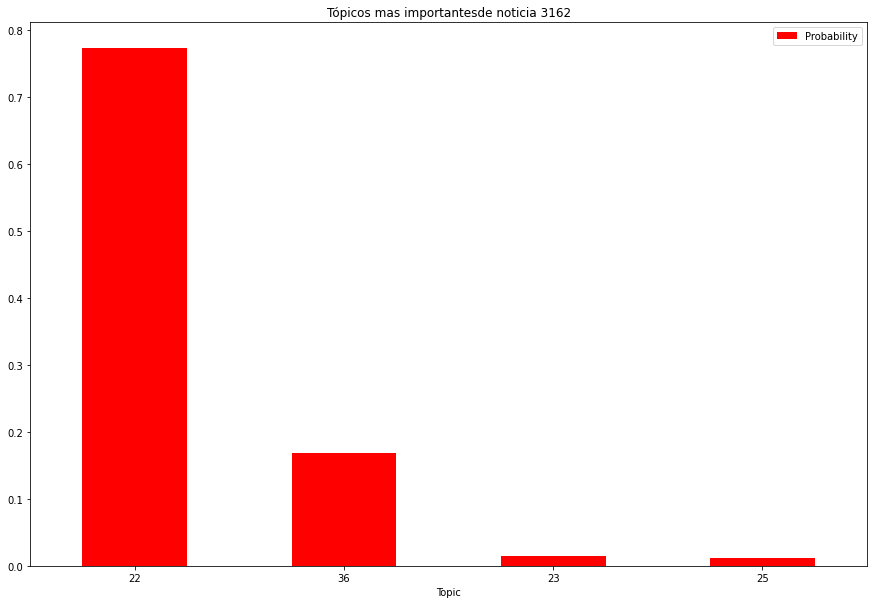

In [ ]:
ax = df_distribucion_topicos_noticia.plot.bar(y='Probability',x='Topic', 
                                   rot=0, color="red",
                                   title = 'Tópicos mas importantes'
                                   'de noticia ' + str(indice_noticia), figsize=(15, 10))

Ahora que vempos la distribución de probabilidades de los distintos topics, estaria bien ver las palabras que componen cada Topic

In [ ]:
for ind, topico in df_distribucion_topicos_noticia.iterrows():
    print("*** Tópico: " + str(int(topico.Topic)) + " ***\tProbabilidad: "+str(topico.Probability))
    palabras = [palabra[0] for palabra in lda.show_topic(
        topicid=int(topico.Topic))]
    palabras = ', '.join(palabras)
    print(palabras, "\n")

*** Tópico: 22 ***	Probabilidad: 0.7736455798149109
madr, comun, gobiern, ayus, president, sanid, regional, madrileñ, autonom, public 

*** Tópico: 36 ***	Probabilidad: 0.16858913004398346
coronavirus, inform, soci, pued, boletin, si, dat, dias, pandemi, crisis 

*** Tópico: 23 ***	Probabilidad: 0.014847928658127785
soci, marz, coronavirus, hazt, eldiari, gobiern, inform, debilit, necesit, desinform 

*** Tópico: 25 ***	Probabilidad: 0.011902328580617905
pp, part, gobiern, ciudadan, cas, polit, president, vox, congres, pso 



Parece que todo funciona bien, pero estamos usando un articulo que el modelo ya ha visto durante su fase de entrenamiento, la pregunta es ¿Como se comportará con articulos nuevos?

Vamos a leer otro articulo que el modelo no ha visto aun

In [ ]:
with open(f'{PATH_DATA}/noticia_1.txt') as texto_articulo:
  articulo_nuevo = texto_articulo.read().replace("\n", " ")

In [ ]:
articulo_nuevo

'Cantabria vivió en 2019 un "año negro" en lo que se refiere a la violencia de género. En esos doce meses, la comunidad acumuló un total de 2.004 denuncias de mujeres que eran víctimas de violencia machista y el año se saldó con dos de ellas asesinadas a manos de sus parejas, "unas cifras que sobrecogen, pero que también marcan la hoja de ruta", según ha reconocido este viernes el portavoz del Gobierno autonómico, Pablo Zuloaga, durante la presentación de la memoria anual.  Y es que los malos datos no paran ahí. Este informe recoge que el número de denuncias presentadas en Cantabria el año pasado supone la cifra más alta registrada hasta ahora, o que se dictaron un total de 116 órdenes de alejamiento y que el 86% de los acusados fueron condenados en firme por los tribunales, unos registros que "avergüenzan" a la sociedad, ha expresado el vicepresidente de Cantabria durante la presentación.  Según la memoria, los Centros de Información y Atención Integral del Gobierno de Cantabria aseso

Ahora vamos a realizar sobre el articulo nuevo todos los pasos de limpieza que hicimos sobre el resto de articulos

In [ ]:
articulo_nuevo = limpiar_texto(articulo_nuevo)
articulo_nuevo = tokenizador.tokenize(articulo_nuevo)
articulo_nuevo = eliminar_stopwords(articulo_nuevo)
articulo_nuevo = stemming_tokens(articulo_nuevo)
articulo_nuevo

['cantabri',
 'viv',
 'año',
 'negr',
 'refier',
 'violenci',
 'gener',
 'doc',
 'mes',
 'comun',
 'acumul',
 'total',
 'denunci',
 'mujer',
 'victim',
 'violenci',
 'machist',
 'año',
 'sald',
 'dos',
 'asesin',
 'man',
 'parej',
 'unas',
 'cifr',
 'sobrecog',
 'marc',
 'hoj',
 'rut',
 'segun',
 'reconoc',
 'viern',
 'portavoz',
 'gobiern',
 'autonom',
 'pabl',
 'zuloag',
 'present',
 'memori',
 'anual',
 'mal',
 'dat',
 'par',
 'ahi',
 'inform',
 'recog',
 'numer',
 'denunci',
 'present',
 'cantabri',
 'año',
 'pas',
 'supon',
 'cifr',
 'alta',
 'registr',
 'ahor',
 'dict',
 'total',
 'orden',
 'alej',
 'acus',
 'conden',
 'firm',
 'tribunal',
 'registr',
 'avergüenz',
 'socied',
 'expres',
 'vicepresident',
 'cantabri',
 'present',
 'segun',
 'memori',
 'centr',
 'inform',
 'atencion',
 'integral',
 'gobiern',
 'cantabri',
 'asesor',
 'mujer',
 'acud',
 'primer',
 'vez',
 'are',
 'mal',
 'trat',
 'mujer',
 'asist',
 'menor',
 'total',
 'person',
 'ingres',
 'centr',
 'emergent',
 'c

Generamos bolsa de palabras para el nuevo articulo

In [ ]:
bow_articulo_nuevo = diccionario.doc2bow(articulo_nuevo)

Y volvemos a calcular la distribución de probabilidades de pertenencia a topics usando el modelo antes entrenado

In [ ]:
distribucion_topicos_noticia_nueva = lda[bow_articulo_nuevo]

Lo pasamos a un dataframe

In [ ]:
df_distribucion_topicos_noticia_nueva = pd.DataFrame(distribucion_topicos_noticia_nueva, columns =['Topic', 'Probability']) # Los pasamos a un dataframe
df_distribucion_topicos_noticia_nueva.sort_values('Probability', ascending=False, inplace=True) # Los ordenamos
df_distribucion_topicos_noticia_nueva.head() # Mostramos los primeros elementos

,Topic,Probability
2,14,0.402187
6,21,0.076806
12,49,0.075675
5,19,0.074860
11,45,0.071404


Pintamos histograma de probabilidad

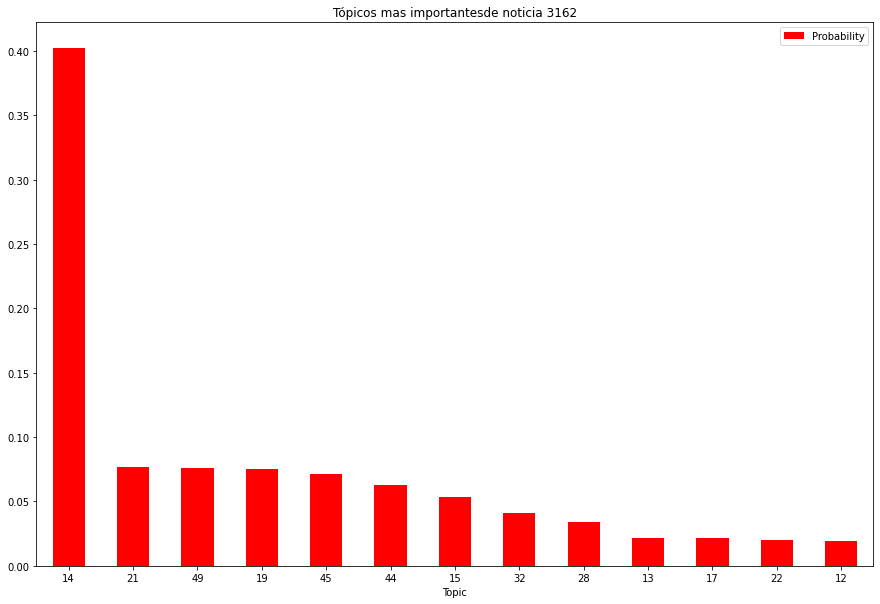

In [ ]:
ax = df_distribucion_topicos_noticia_nueva.plot.bar(y='Probability',x='Topic', 
                                   rot=0, color="red",
                                   title = 'Tópicos mas importantes'
                                   'de noticia ' + str(indice_noticia), figsize=(15, 10))

Y mostramos el contenido de los topics

In [ ]:
for ind, topico in df_distribucion_topicos_noticia_nueva.iterrows():
    print("*** Tópico: " + str(int(topico.Topic)) + " ***\tProbabilidad: "+str(topico.Probability))
    palabras = [palabra[0] for palabra in lda.show_topic(
        topicid=int(topico.Topic))]
    palabras = ', '.join(palabras)
    print(palabras, "\n")

*** Tópico: 14 ***	Probabilidad: 0.4021874666213989
mujer, sexual, violenci, gener, hombr, person, femin, muj, victim, iguald 

*** Tópico: 21 ***	Probabilidad: 0.07680614292621613
visit, cultur, muse, obras, artist, arte, cultural, obra, turism, ciud 

*** Tópico: 49 ***	Probabilidad: 0.07567523419857025
hac, si, pued, ser, cre, pod, sol, pas, habl, mism 

*** Tópico: 19 ***	Probabilidad: 0.07486005127429962
cas, posit, resident, person, fallec, nuev, numer, cov, centr, dat 

*** Tópico: 45 ***	Probabilidad: 0.07140395790338516
ley, derech, deb, trabaj, public, pued, inform, administr, consider, si 

*** Tópico: 44 ***	Probabilidad: 0.06287147104740143
delit, tribunal, juez, fiscal, acus, juzg, conden, cas, judicial, suprem 

*** Tópico: 15 ***	Probabilidad: 0.05320088192820549
pod, gobiern, polit, acuerd, sanchez, part, pnv, unid, iglesi, social 

*** Tópico: 32 ***	Probabilidad: 0.04137364402413368
med, nuev, pais, pandemi, seman, salud, poblacion, pas, aument, mes 

*** Tópico: 28 

Podemos infereir que el topic 14, que es el predominante, hace referencia a la violencia de genero, por lo tanto, parece coherente con el articulo en si

Por comodidad, vamos a crear una función que a partir de un texto, sea capaz de ejecutar todos los pasos que acabamos de realizar, de forma que sea muy sencillo realizarlo para nuevas noticias

Funcion para procesar el texto de una noticia

In [ ]:
def procesar_texto_noticia(texto):
  texto_tratado = limpiar_texto(texto)
  texto_tratado = tokenizador.tokenize(texto_tratado)
  texto_tratado = eliminar_stopwords(texto_tratado)
  texto_tratado = stemming_tokens(texto_tratado)
  bow = diccionario.doc2bow(texto_tratado)
  return texto_tratado,bow


In [ ]:
def categorizar_noticias_en_topic(modelo,diccionario,texto):
  print(f'Texto de la noticia: {texto}\n')
  texto_tratado, bow = procesar_texto_noticia(texto)
  distribucion_topics = modelo[bow]
  df = pd.DataFrame(distribucion_topics, columns =['Topic', 'Probability']) # Los pasamos a un dataframe
  df.sort_values('Probability', ascending=False, inplace=True) # Los ordenamos
  ax = df.plot.bar(y='Probability',x='Topic', 
                                   rot=0, color="red",
                                   title = 'Tópicos mas importantes'
                                   'de noticia ', figsize=(15, 10))
  for ind, topico in df.iterrows():
    print("*** Tópico: " + str(int(topico.Topic)) + " ***\tProbabilidad: "+str(topico.Probability))
    palabras = [palabra[0] for palabra in modelo.show_topic(
        topicid=int(topico.Topic))]
    palabras = ', '.join(palabras)
    print(palabras, "\n")
  

In [ ]:
with open(f'{PATH_DATA}/noticia_2.txt') as texto_articulo:
  articulo_nuevo = texto_articulo.read().replace("\n", " ")

Texto de la noticia: El Servicio Postal de Estados Unidos (USPS, por sus siglas en inglés) se ha convertido en los últimos días en protagonista de la pelea entre Donald Trump y los demócratas de cara a las elecciones del próximo 3 de noviembre.  El presidente clama contra "los riesgos de fraude del voto universal por correo" y dice que, si se permite, Estados Unidos será "el hazmerreír de todo el mundo".  Del otro lado, los demócratas, liderados por la presidenta de la Cámara de Representantes, Nancy Pelosi, denuncian que Trump encabeza "una campaña para sabotear las elecciones".  Este año, además, el país se encuentra en plena pandemia de coronavirus, lo que desanimará aún más a los electores a acudir a las urnas.  Se espera, por tanto, que el voto por correo alcance cifras récord y de ahí que haya cobrado especial relevancia en el debate político.  El propio servicio postal ha advertido que es posible que millones de papeletas no lleguen a tiempo de ser contadas. Distintos tipos de v

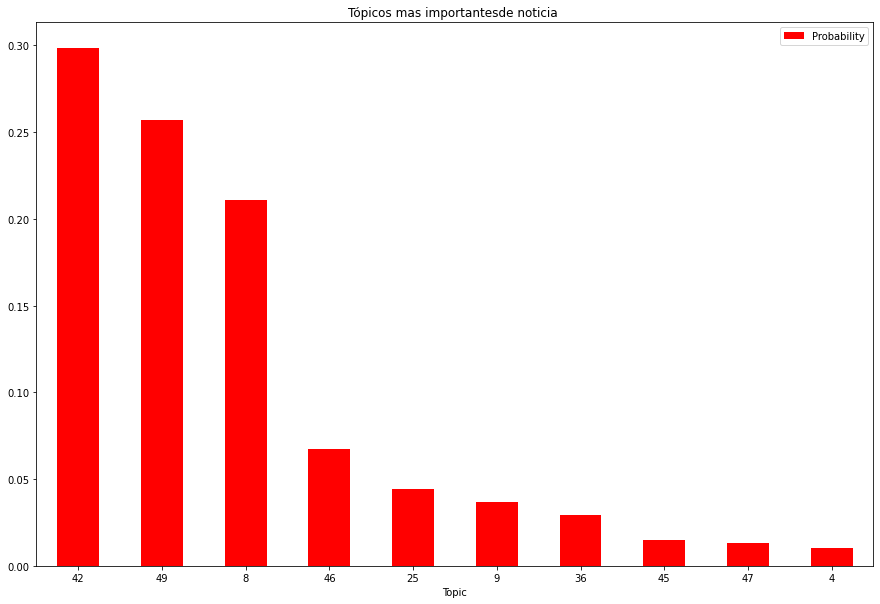

In [ ]:
categorizar_noticias_en_topic(lda,diccionario,articulo_nuevo)

##  Similitud entre textos

Tiene muchas aplicaciones practicas, por ejemplo los gobiernos, la jsuticia y las empresas generan un sin fin de documentación. 

Buscar contenido relevante en esa documentaación pude ser una tarea realmente complicada

Por eso es necesario crear motores de búsqueda que tengan en cuenta no solo la similitud léxica (es decir entre palabras), sino tambien la similitud semantica (de significados)

Una tecnica habitual, consiste en representar los documentos como bolsas de palabras, y aplicar la similitud coseno, sobre las bolsas de palabras de dos documentos distintos. En este caso la similitud dependera del número de palabras que compartan.

Hay algunos problemas asiciados a esto:
- Las palabras pueden tener varios significados, y sin contexto, no podemos saber a cual de ellos es el usado en el texto.
- Tambien es probable es uso de sinonimos, es decir palabras (o expresiones) que morfologicaminte sean muy distintas, pero que realmente hagan referencia al mismo concepto. Por ejemplo  “Fui en coche a su casa y compramos algo para comer” y “El otro día conduje hacia su piso y pedimos unas hamburguesas»

### Similitud semántica

Hay varias formas de tener en cuenta la similitud semántica

Quizas la mas comun se el entrenamiento de un Word Embedding de forma que sea posible calcular la similitud semántica, en función de la proximidad de los vectores de las palabras que componen el documento.

Aqui vamos a usar una tecnica diferente, aprobechando el modelo LDA que tenemos entrenado.

Para ello calcularemos la similitud mediante la metrica de distancia Jensen-Shannon, que usa las distribuciones de topicos de el modelo LDA.

### Mética de similitud Jensen Shannon

Conceptualmente es sencillo.

Partimos de las listas de topics, y lo que haremos es calcular la distancia entre un texto nuevo, y la lista de topics.

La distancia de Jensen-Shannon es una medida de deistancia estadistica entre distribuciones de probabilidad, por lo tanto nos retornara un valor entre 0 y 1, donde 0, implica ninguna similitud, y 1 una similitud exacta.

Para encontrar mñas detalles de la distancia de Jensen-Shannon a nivel matemático, podemos encontrarlos [aqui](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence), pero no es objetivo de este curso.

Para usarlo dentro del contexto de la librería Gensim, podemos importarlo del paquete matutils

In [ ]:
from gensim.matutils import jensen_shannon

Vamos a usar la misma noticia de violencia de genero de Cantabria en este ejemplo

La leemos

In [ ]:
with open(f'{PATH_DATA}/noticia_2.txt') as texto_articulo:
  texto = texto_articulo.read().replace("\n", " ")

Y la procesamos para obtener la bolsa de palabras

In [ ]:
texto_tratado, bow = procesar_texto_noticia(texto)

Ahora vamos a obtener la distribución de topics para el documento, mediante el uso de la función **get_document_topics**, de el modelo **lda**, con el parámetro **minimum_probability** a 0, para que no filtre ningún topic

In [ ]:
distribucion_noticia = lda.get_document_topics(bow_articulo_nuevo, 
                                               minimum_probability=0)
distribucion_noticia.sort(key=lambda x:x[1], reverse=True)
distribucion_noticia

[(14, 0.40276822),
 (21, 0.07687839),
 (49, 0.0752294),
 (19, 0.07445845),
 (45, 0.06969618),
 (44, 0.06289494),
 (15, 0.04735688),
 (32, 0.040679354),
 (28, 0.03331958),
 (22, 0.025346763),
 (13, 0.021483773),
 (17, 0.02143669),
 (12, 0.019379236),
 (24, 0.009898525),
 (33, 0.0071867267),
 (11, 0.0057484247),
 (8, 0.00042462515),
 (18, 0.00031135615),
 (25, 0.000280308),
 (20, 0.00028005423),
 (47, 0.00027231337),
 (40, 0.00027190836),
 (36, 0.00027079406),
 (41, 0.00024508894),
 (6, 0.00022571937),
 (10, 0.0002226863),
 (37, 0.00022145433),
 (23, 0.00022003321),
 (30, 0.00021400073),
 (27, 0.00021341312),
 (5, 0.0002093568),
 (0, 0.00020697301),
 (29, 0.00019069015),
 (38, 0.00018272432),
 (9, 0.00017265484),
 (3, 0.00016933645),
 (2, 0.00015056078),
 (7, 0.0001496571),
 (46, 0.00014909588),
 (4, 0.00011964893),
 (31, 0.00010667259),
 (35, 0.00010590284),
 (16, 9.6012984e-05),
 (1, 9.184626e-05),
 (39, 9.165611e-05),
 (42, 8.8922505e-05),
 (43, 7.860517e-05),
 (26, 7.211872e-05),
 (3

Ahora vamos a crear una funcion que calcule la distancia de Jensen Shannon, a partir de dos distribuciones

In [ ]:
def calcular_similitud_jensen_shannon(doc_dist1, doc_dist2):
    """Calcula la distancia Jensen Shannon entre dos distribuciones.
    """
    return jensen_shannon(doc_dist1, doc_dist2)

Ahora vamos a crear un método, que busque dentro de todo el corpus, y calcule para cada documento, la distancia Jensen Shannon, retornandolo como una lista ordenada de mayor similitud a menor

In [ ]:
import numpy as np
distancias = [calcular_similitud_jensen_shannon(distribucion_noticia, lda[noticia]) for noticia in corpus] # Aqui obtenemos una lista con las distancias
similatidades = np.argsort(distancias) # Aqui obtenemos el indice por el que podemos ordenar la lista, ordenados de mayor a menor

In [ ]:
for i in range(0,10): # Iteramos por el número de noticias que queremos mostrar, en esta cado 10
        titular = df_noticias.iloc[int(similatidades[i])].Titular # Y extraemos el titular del data Frame, accediendo por medio del indice
        print(f'{i + 1}: {titular} ({distancias[similatidades[i]]})') # Y pintamos el resultado

1: El año arranca con el reto de reconocer la violencia machista fuera de la pareja tras los 47 asesinatos contabilizados en 2018 (0.11781033128499985)
2: Las mujeres denuncian en España una violación cada cinco horas (0.16843631863594055)
3: La Ley de Libertad Sexual hace estallar el conflicto dentro del Gobierno por liderar las políticas feministas (0.1726008802652359)
4: El 57,3% de las mujeres mayores de 16 años que viven en España ha sufrido algún tipo de violencia machista en su vida (0.17974084615707397)
5: DATOS | Sin centros de emergencia en un país que registra más de una denuncia por violencia sexual cada hora (0.1807909905910492)
6: La comisión sobre delitos sexuales decide recuperar el término 'violación' de forma expresa en el Código Penal (0.18264542520046234)
7: El Supremo va por delante de la ley y avala que las personas trans cambien su sexo en el DNI sin el requisito de hormonarse (0.18285489082336426)
8: La Fiscalía recurre la sentencia de 'la manada' y pide que se 

Ahora por comodidad, juntaremos todo en un función

In [ ]:
def buscar_noticas_similares(texto, df, corpus, modelo, n):
  import numpy as np
  print(f'Noticia: {texto}\n')
  texto_tratado, bow = procesar_texto_noticia(texto)
  distribucion_noticia = lda.get_document_topics(bow, 
                                               minimum_probability=0)
  distancias = [calcular_similitud_jensen_shannon(distribucion_noticia, modelo[noticia]) for noticia in corpus] # Aqui obtenemos una lista con las distancias
  similatidades = np.argsort(distancias) # Aqui obtenemos el indice por el que podemos ordenar la lista, ordenados de mayor a menor
  for i in range(0,n): # Iteramos por el número de noticias que queremos mostrar, en esta cado 10
        titular = df.iloc[int(similatidades[i])].Titular # Y extraemos el titular del data Frame, accediendo por medio del indice
        print(f'{i + 1}:\tTitular: "{titular}"\tDistancia: ({distancias[similatidades[i]]})\tSimilitud: ({(1-(distancias[similatidades[i]]))*100:.2f}%)') # Y pintamos el resultado

Y lo aplicamos a otra noticia (noticia_2)

In [ ]:
with open(f'{PATH_DATA}/noticia_2.txt') as texto_articulo:
  articulo_nuevo = texto_articulo.read().replace("\n", " ")

In [ ]:
buscar_noticas_similares(articulo_nuevo,df_noticias,corpus,lda,20)

Noticia: El Servicio Postal de Estados Unidos (USPS, por sus siglas en inglés) se ha convertido en los últimos días en protagonista de la pelea entre Donald Trump y los demócratas de cara a las elecciones del próximo 3 de noviembre.  El presidente clama contra "los riesgos de fraude del voto universal por correo" y dice que, si se permite, Estados Unidos será "el hazmerreír de todo el mundo".  Del otro lado, los demócratas, liderados por la presidenta de la Cámara de Representantes, Nancy Pelosi, denuncian que Trump encabeza "una campaña para sabotear las elecciones".  Este año, además, el país se encuentra en plena pandemia de coronavirus, lo que desanimará aún más a los electores a acudir a las urnas.  Se espera, por tanto, que el voto por correo alcance cifras récord y de ahí que haya cobrado especial relevancia en el debate político.  El propio servicio postal ha advertido que es posible que millones de papeletas no lleguen a tiempo de ser contadas. Distintos tipos de voto por corr